# Decision Tree Model

In [38]:
# decision tree model


## Load Cancer dataset


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

c:\Users\Juan Navarro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


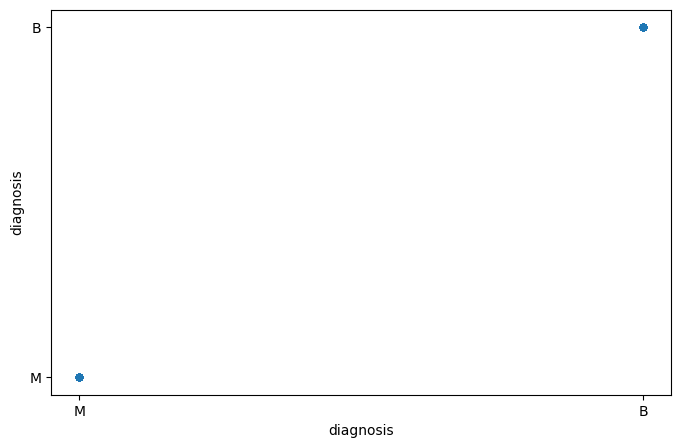

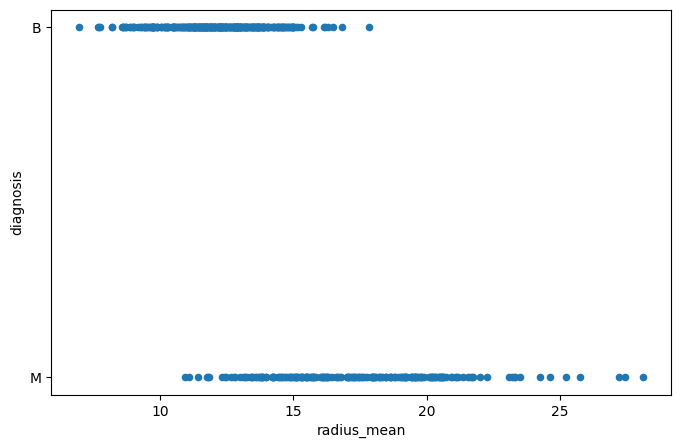

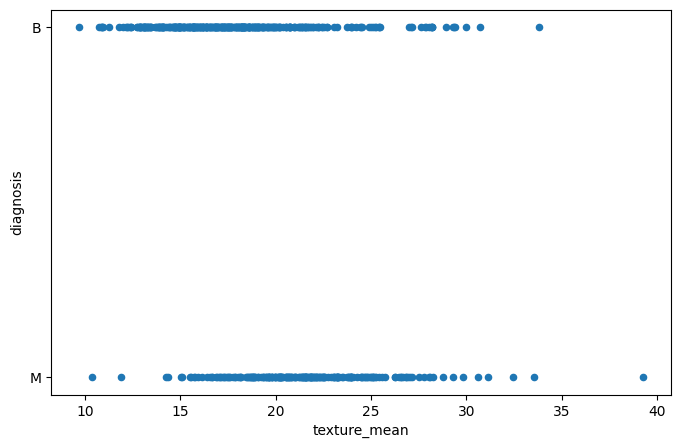

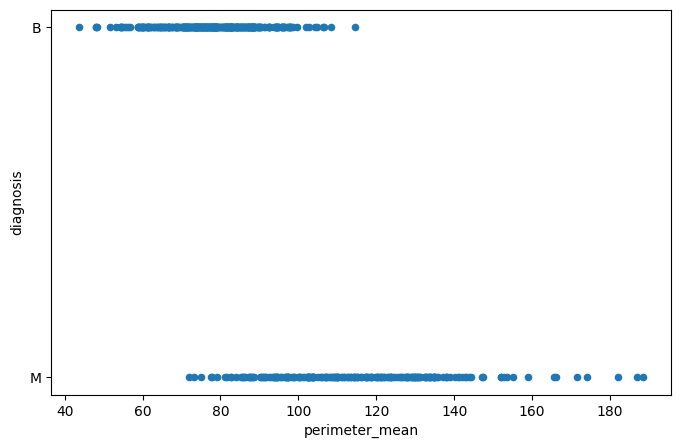

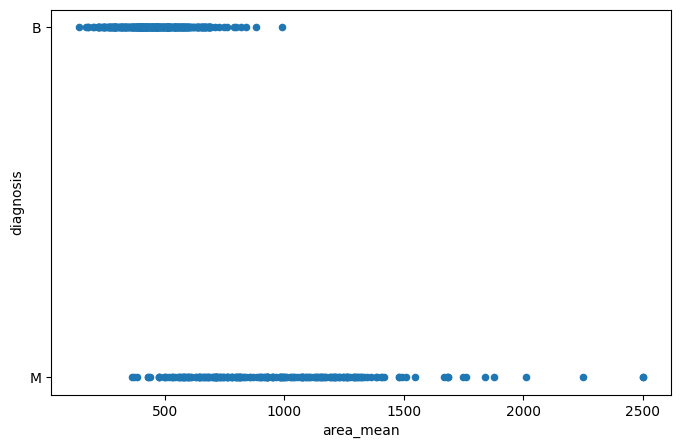

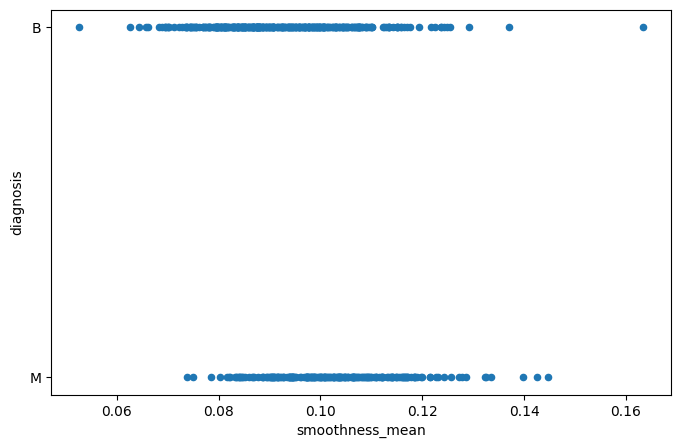

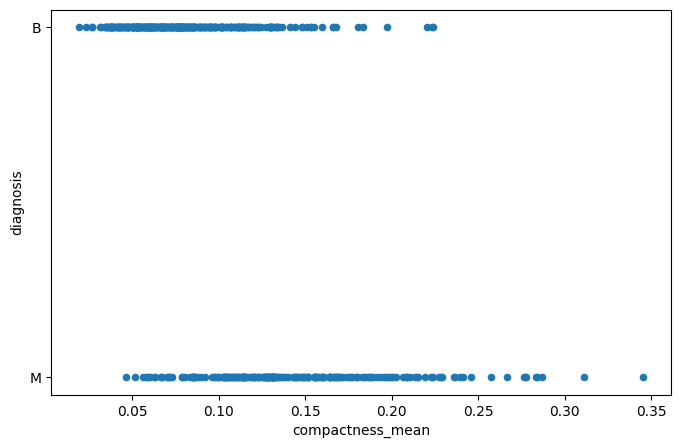

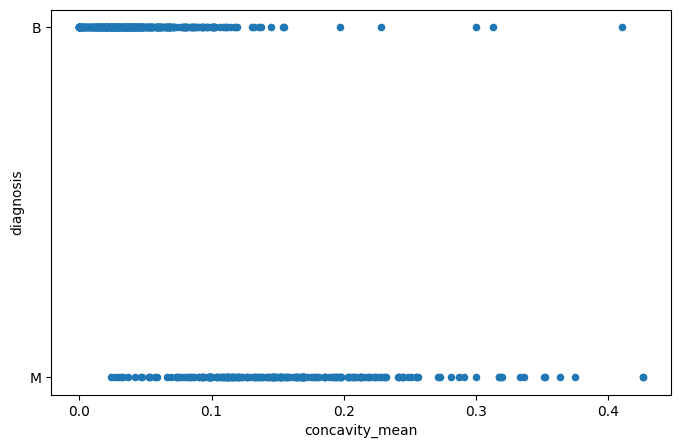

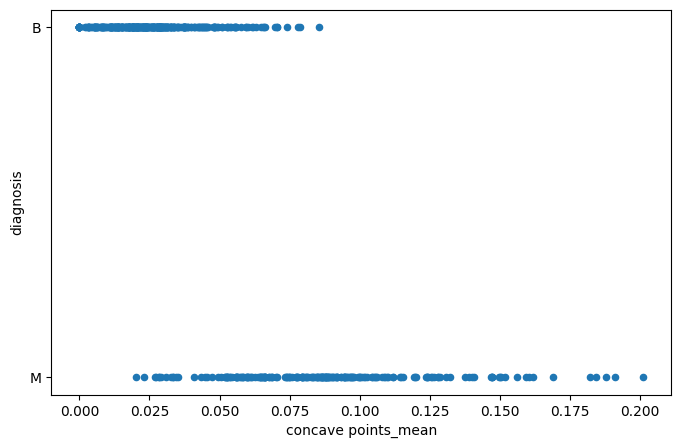

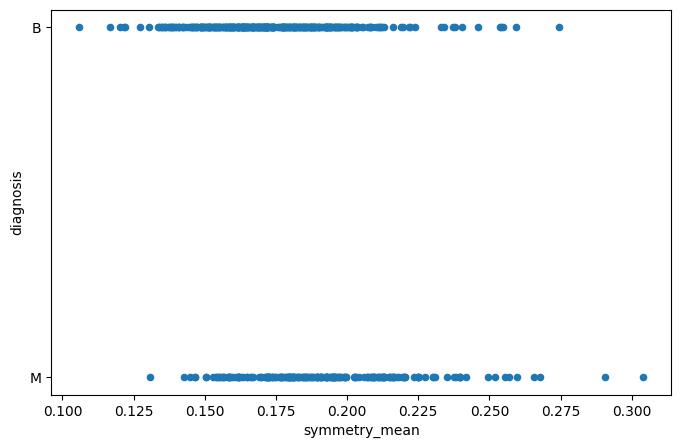

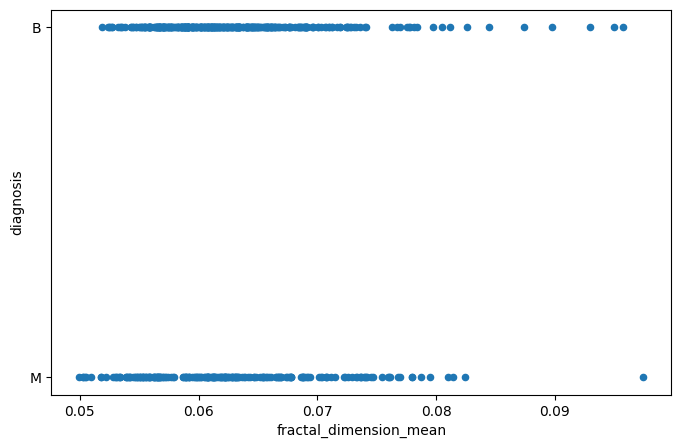

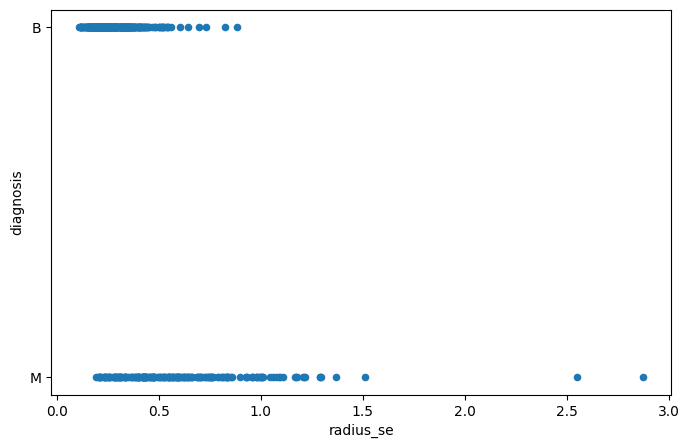

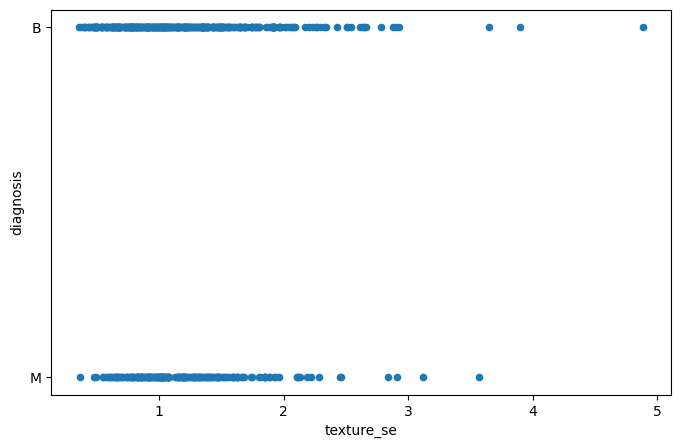

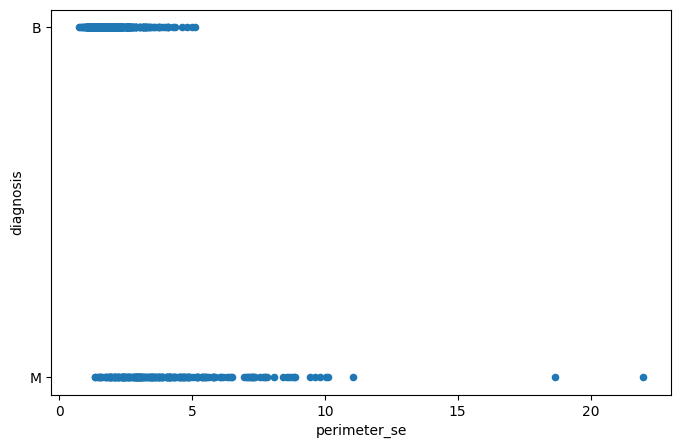

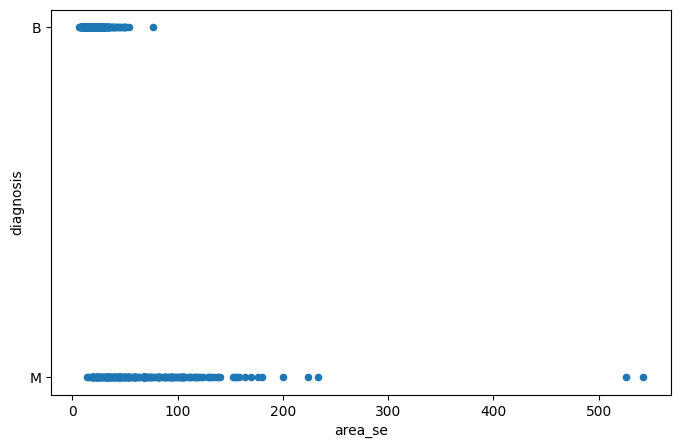

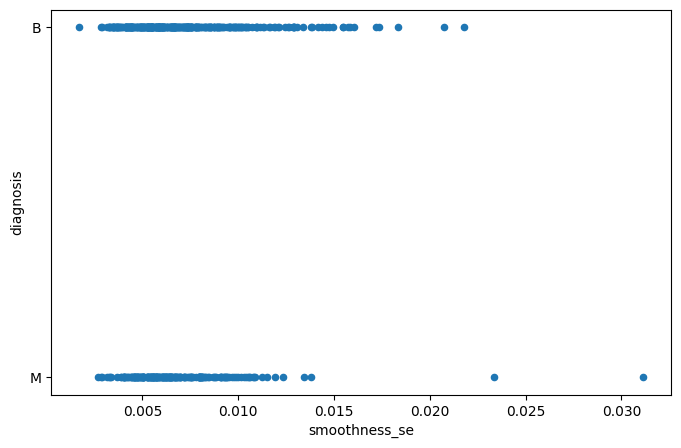

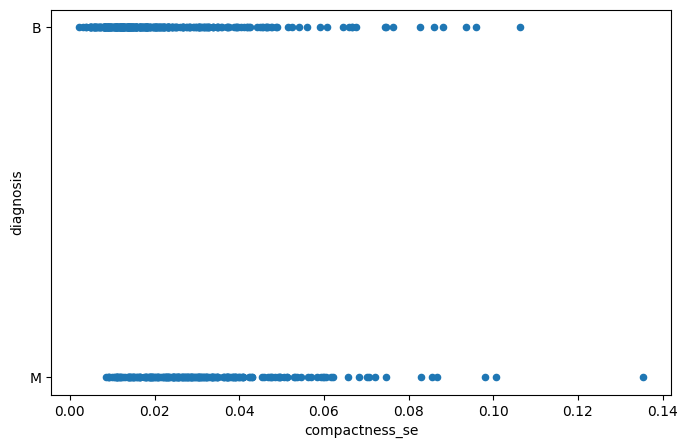

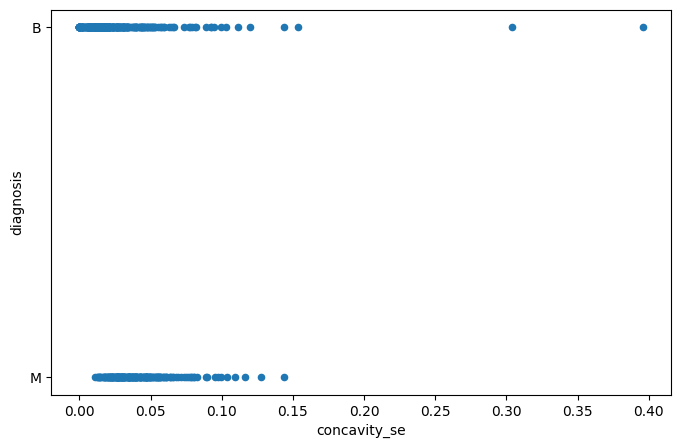

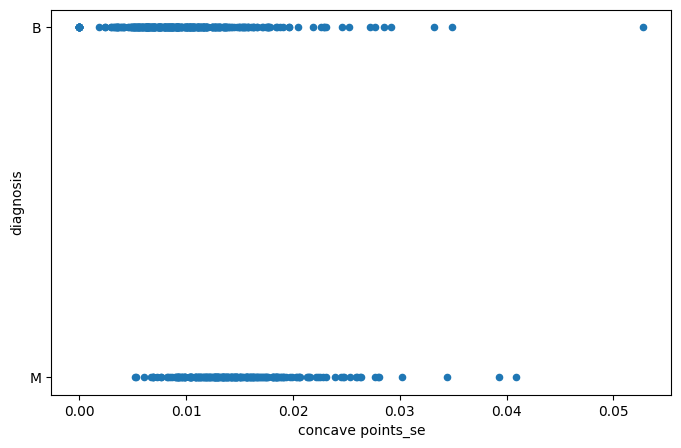

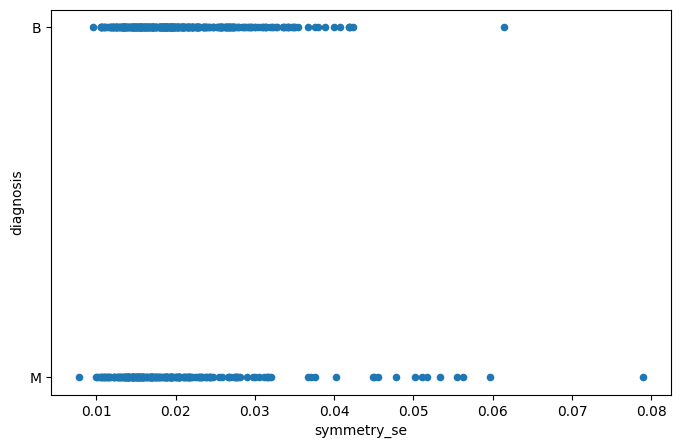

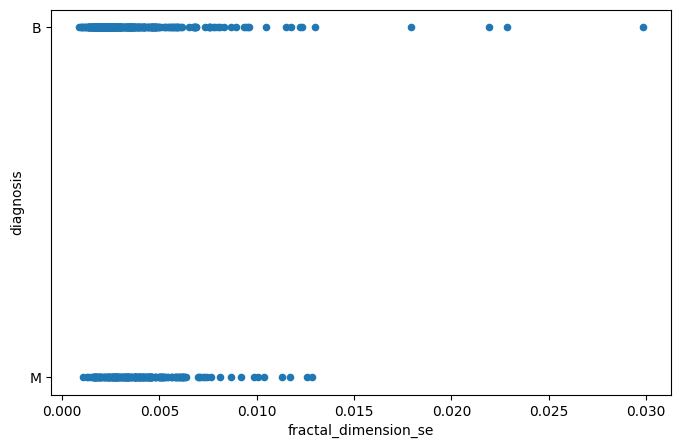

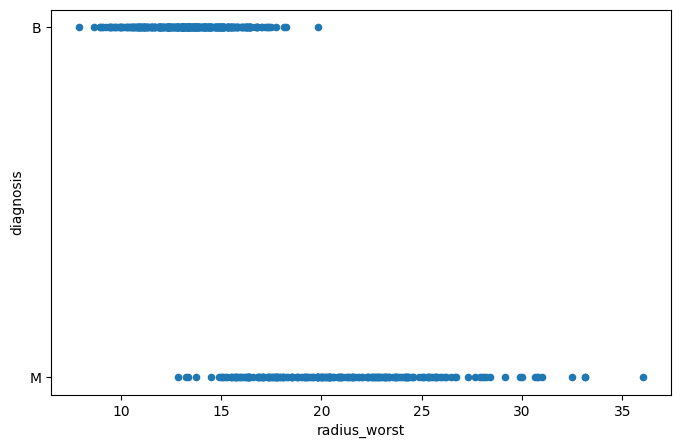

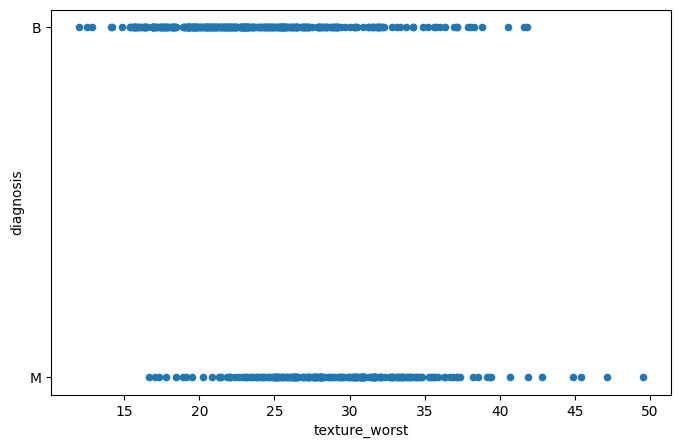

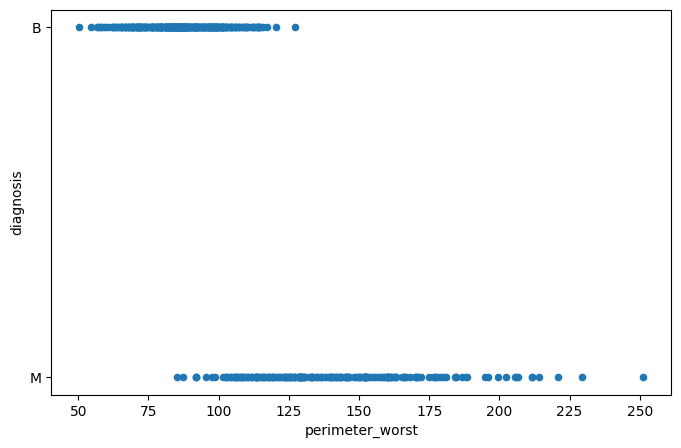

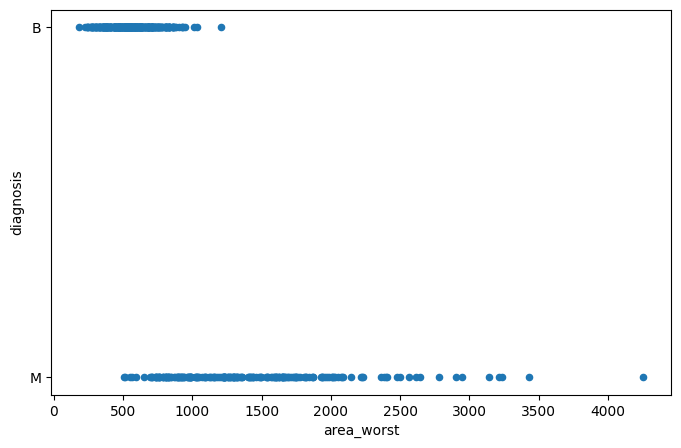

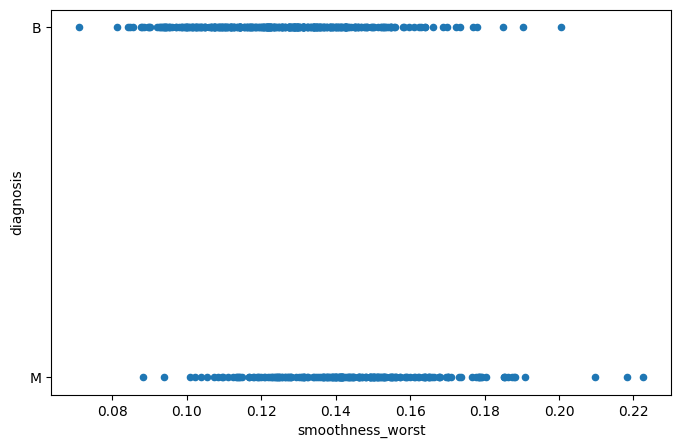

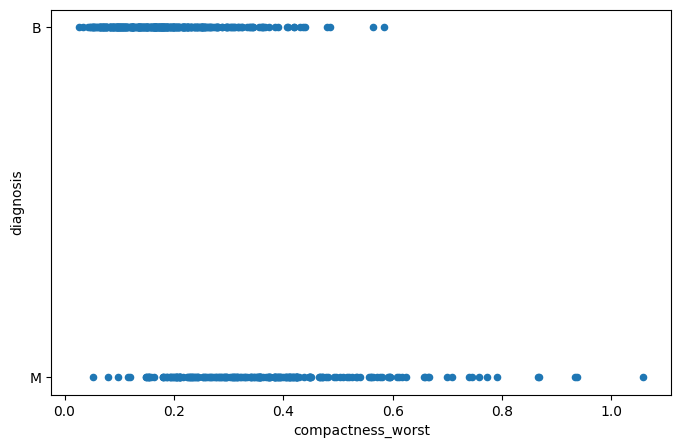

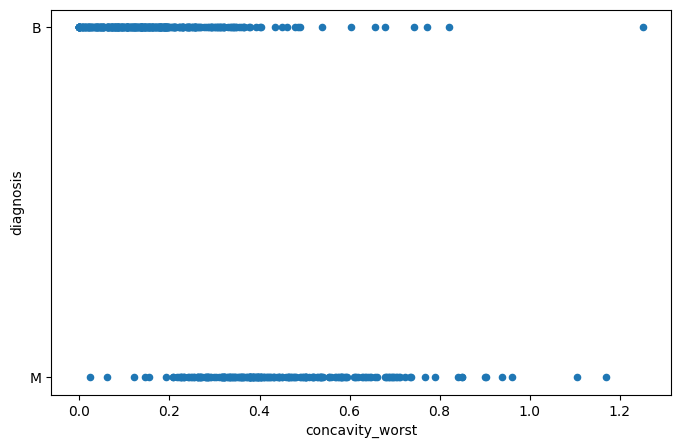

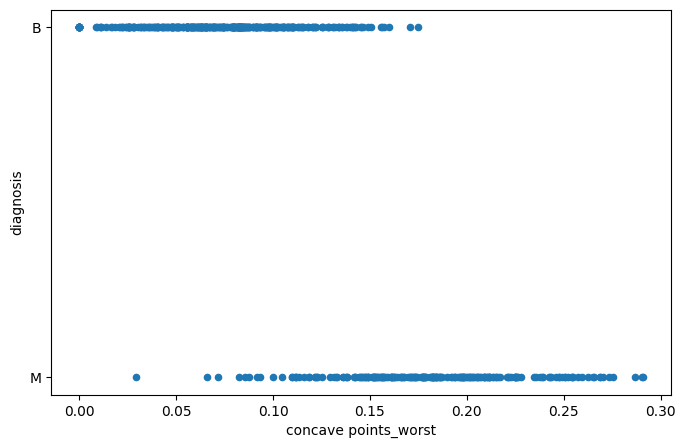

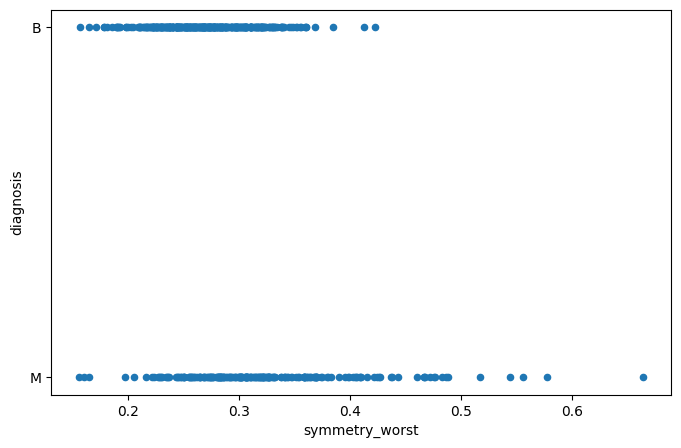

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read the dataset
df_cancer = pd.read_csv('datasets/Cancer_Data.csv')

# make sure that there are no null values that can affect the models
mask = df_cancer.isnull()
print(mask.sum())

# delete unnecesary or null columns
df_cancer = df_cancer.drop(columns=['id', 'Unnamed: 32'])

# visualizing the values of each feature and the comparison to the output
for col in df_cancer.columns[:-1]:
    df_cancer.plot(x=col, y='diagnosis', kind='scatter', figsize=(8, 5))
plt.show()

df_cancer.columns

diagnosis                  408
radius_mean                408
texture_mean               408
perimeter_mean             408
area_mean                  408
smoothness_mean            408
compactness_mean           408
concavity_mean             408
concave points_mean        408
symmetry_mean              408
fractal_dimension_mean     408
radius_se                  408
texture_se                 408
perimeter_se               408
area_se                    408
smoothness_se              408
compactness_se             408
concavity_se               408
concave points_se          408
symmetry_se                408
fractal_dimension_se       408
radius_worst               408
texture_worst              408
perimeter_worst            408
area_worst                 408
smoothness_worst           408
compactness_worst          408
concavity_worst            408
concave points_worst       408
symmetry_worst             408
fractal_dimension_worst    408
dtype: int64


c:\Users\Juan Navarro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


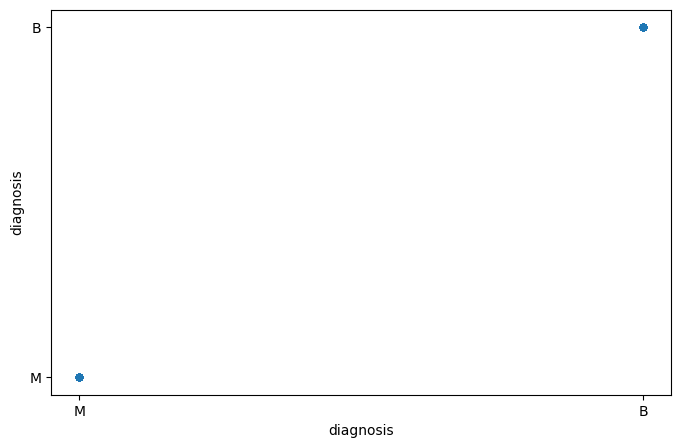

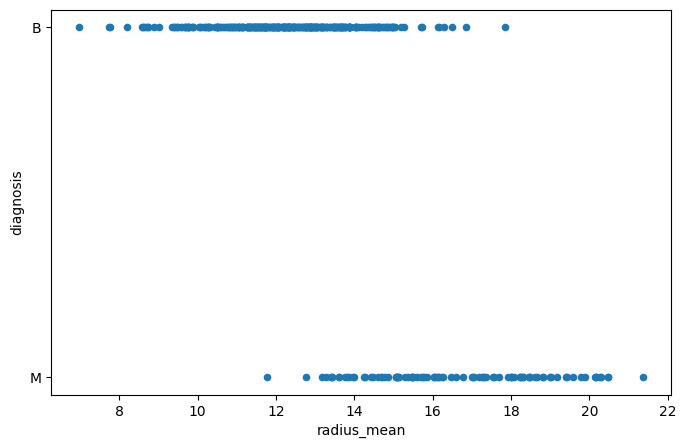

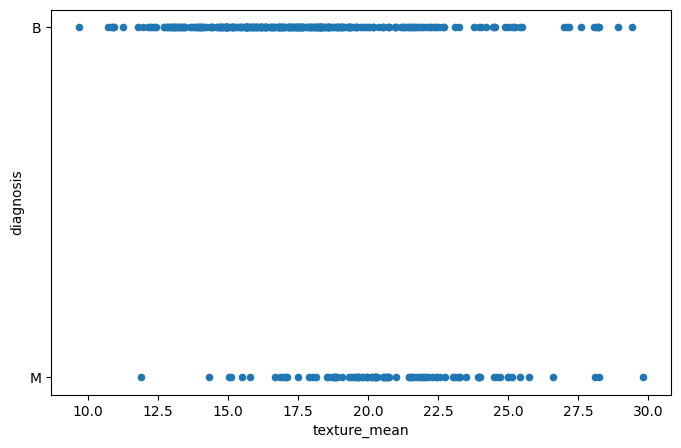

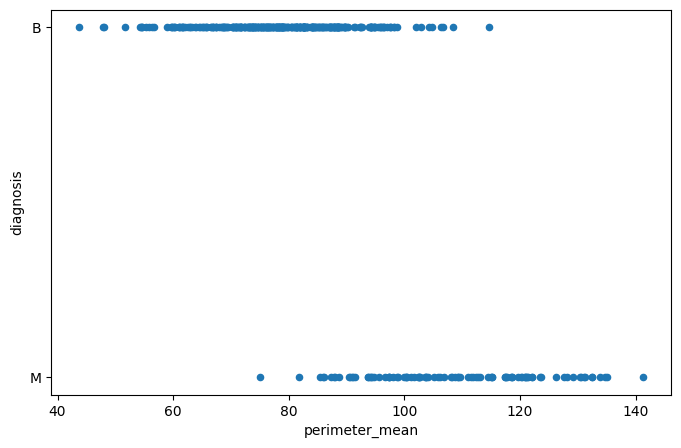

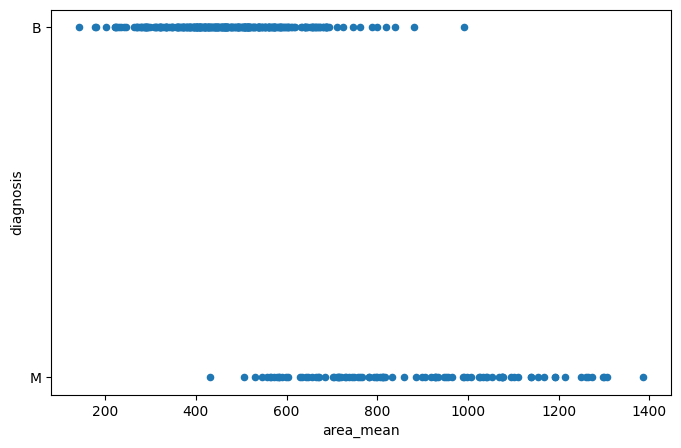

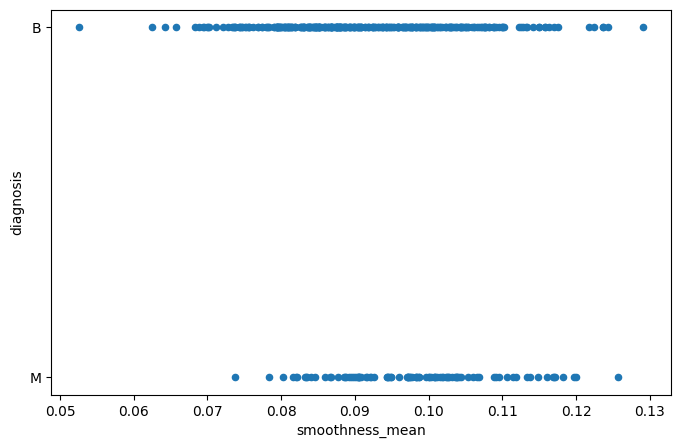

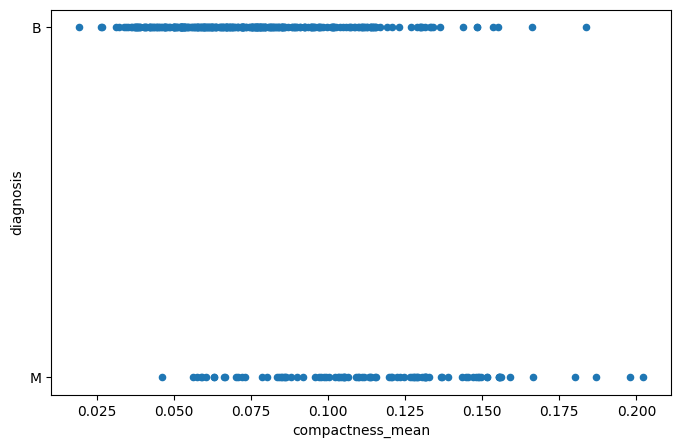

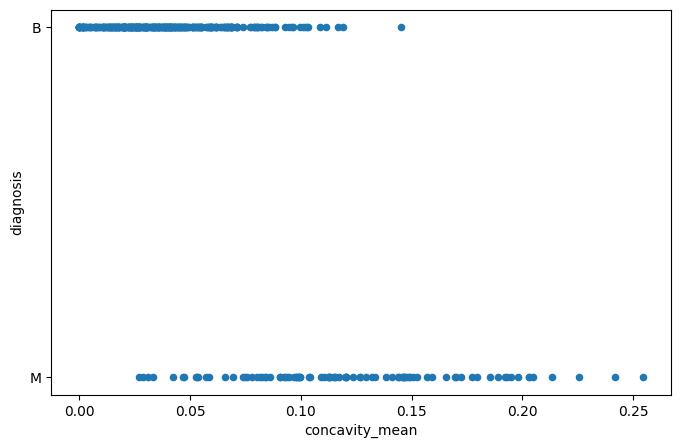

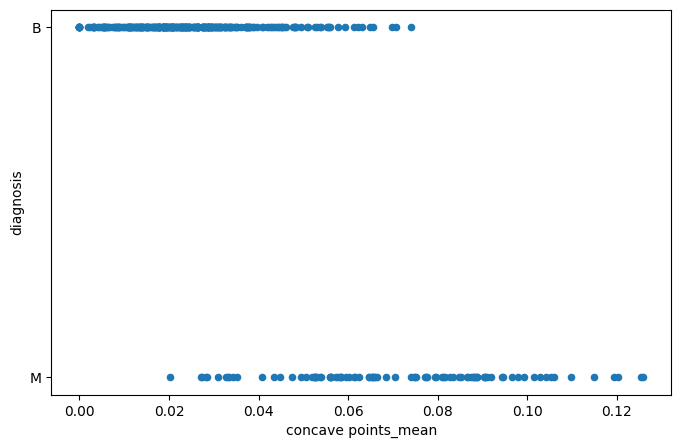

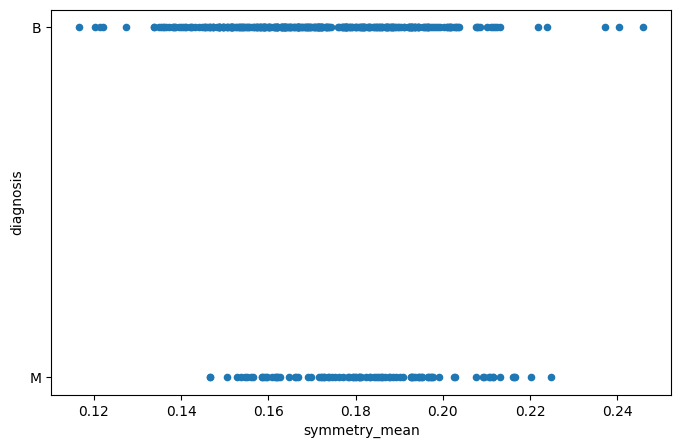

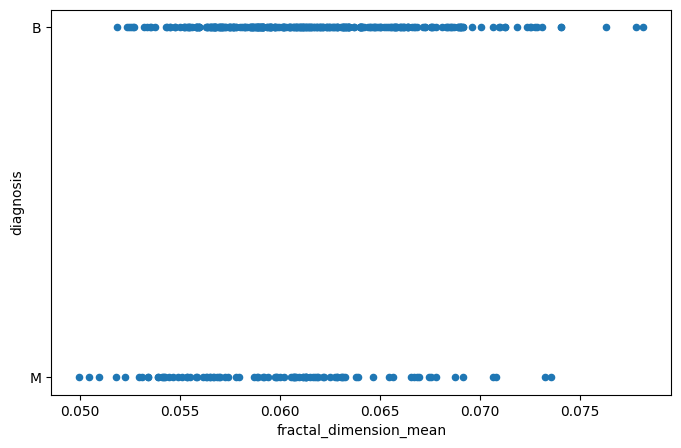

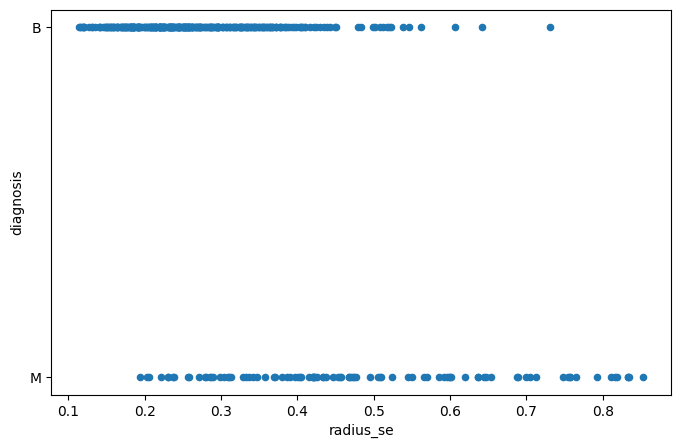

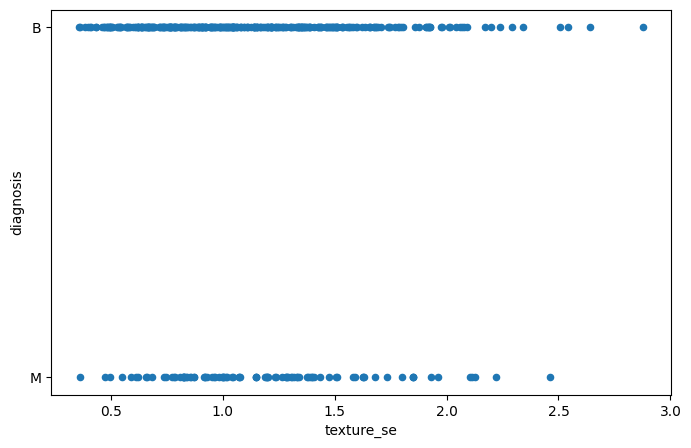

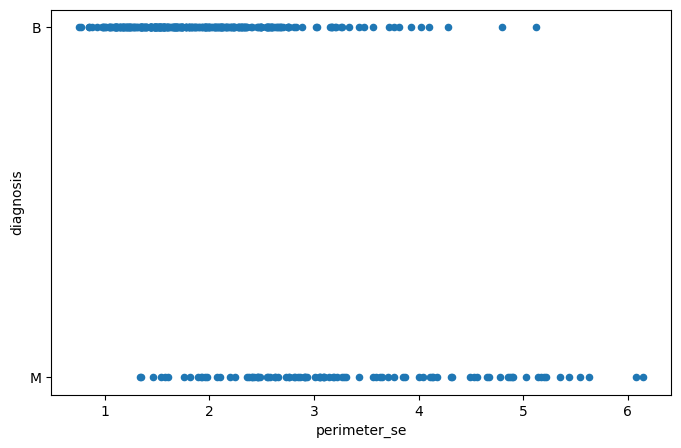

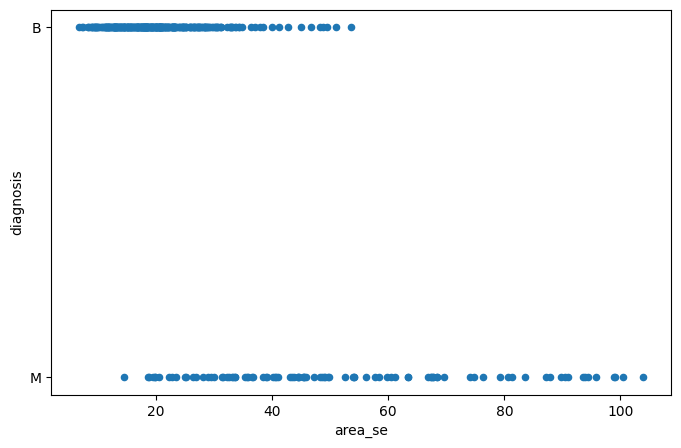

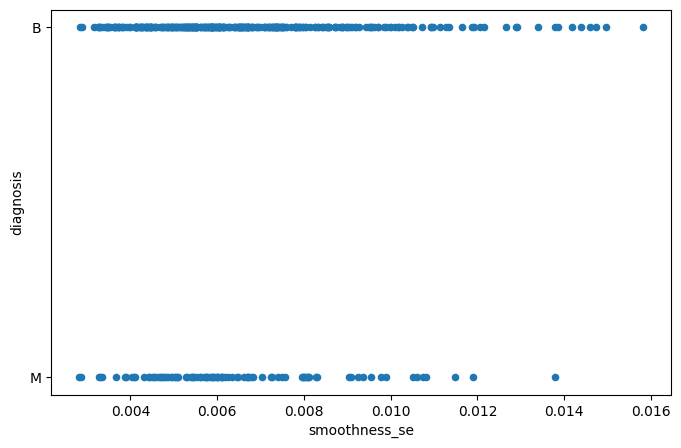

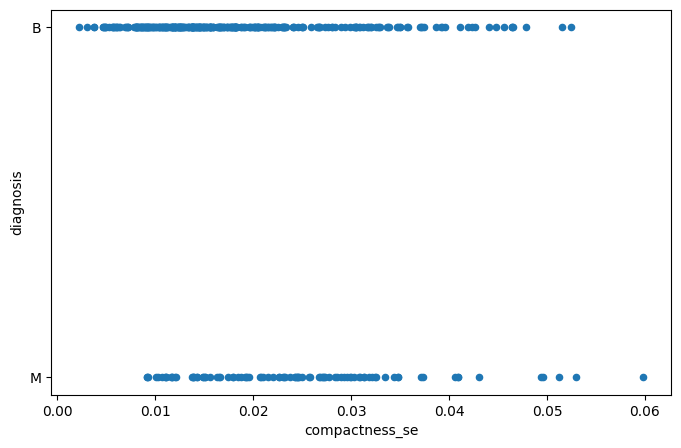

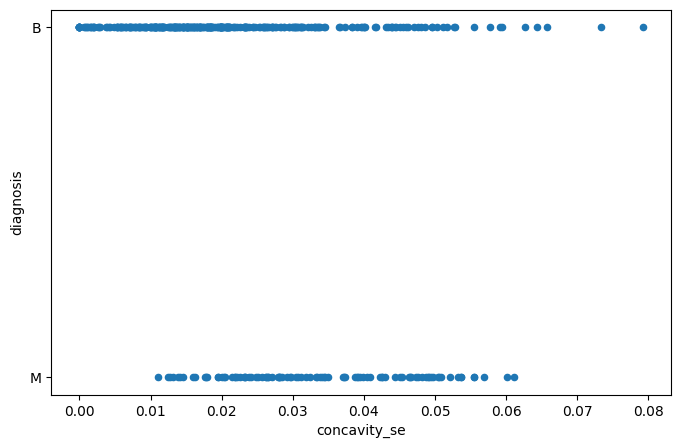

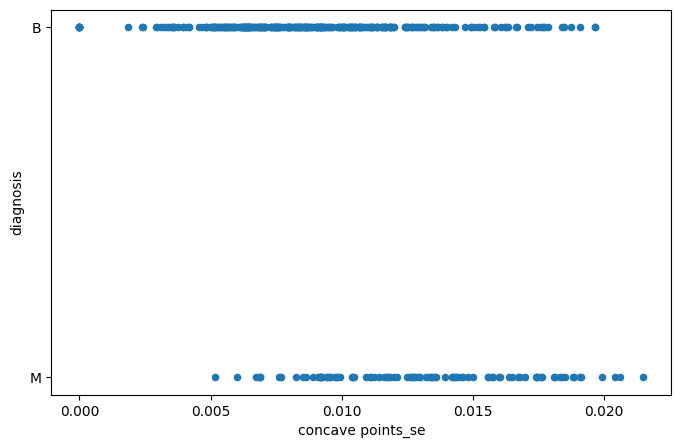

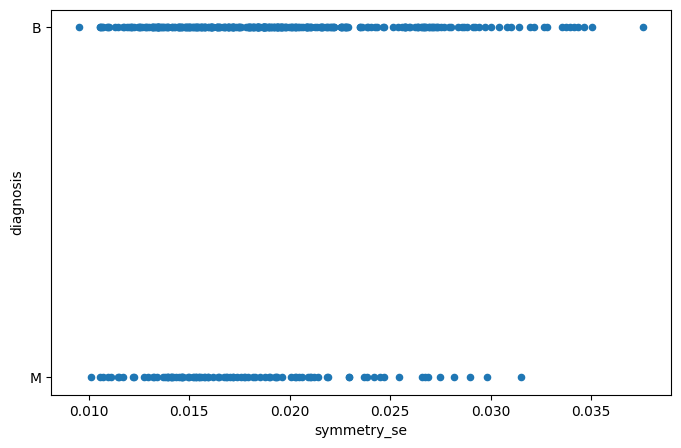

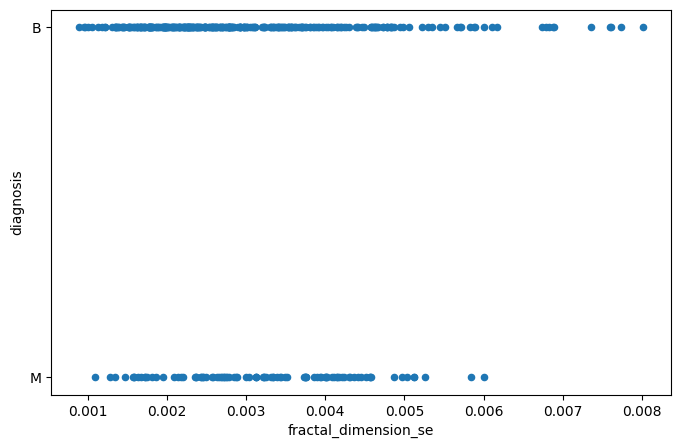

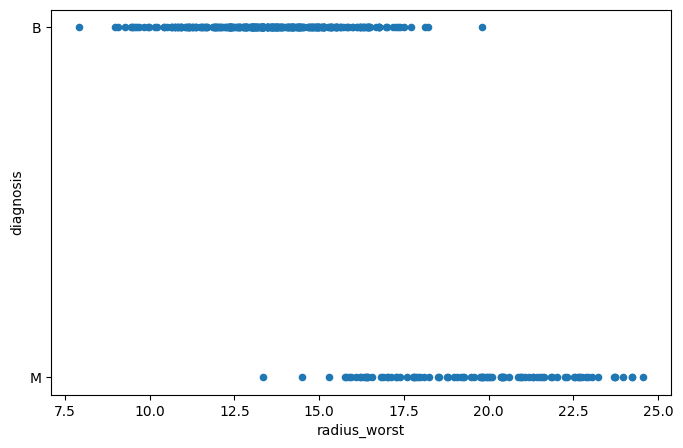

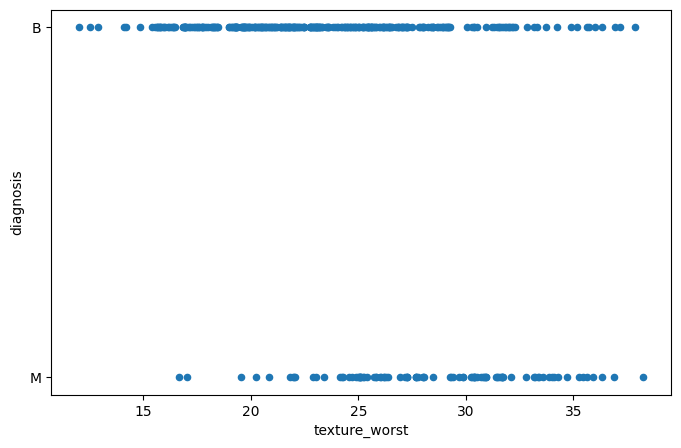

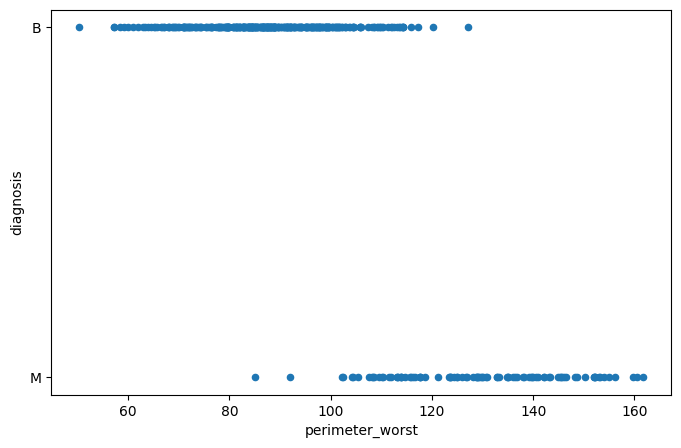

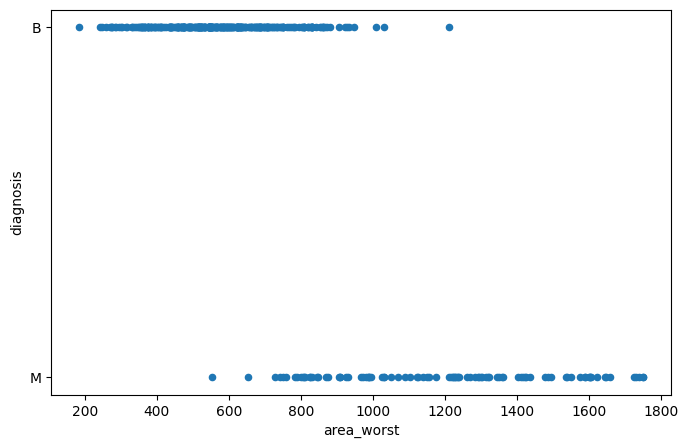

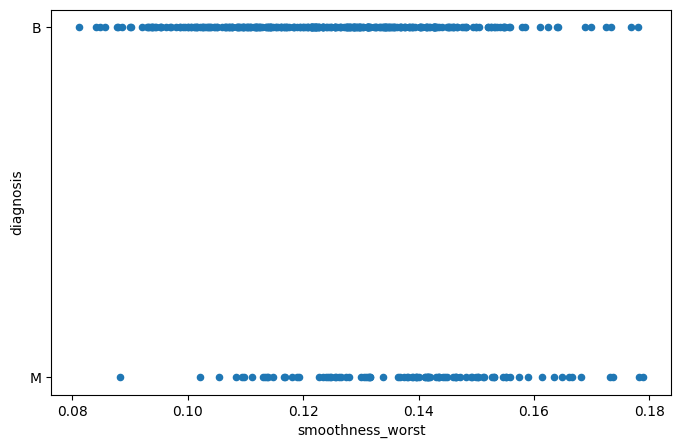

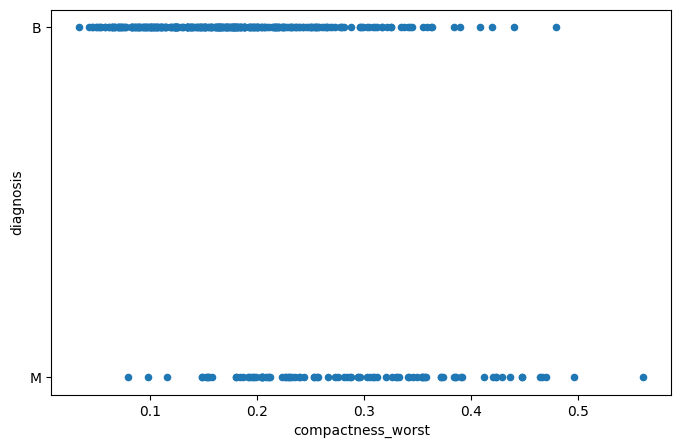

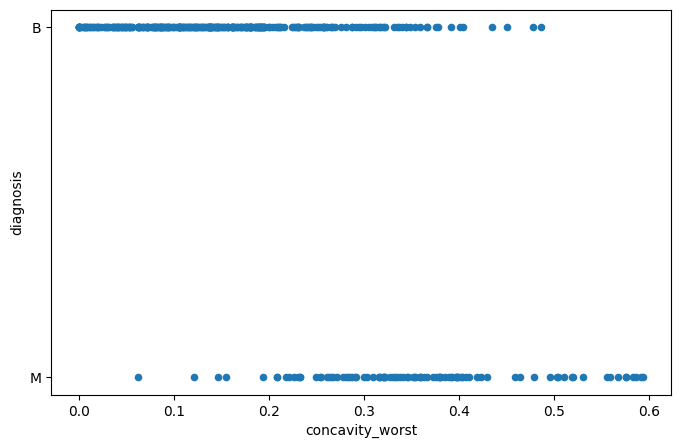

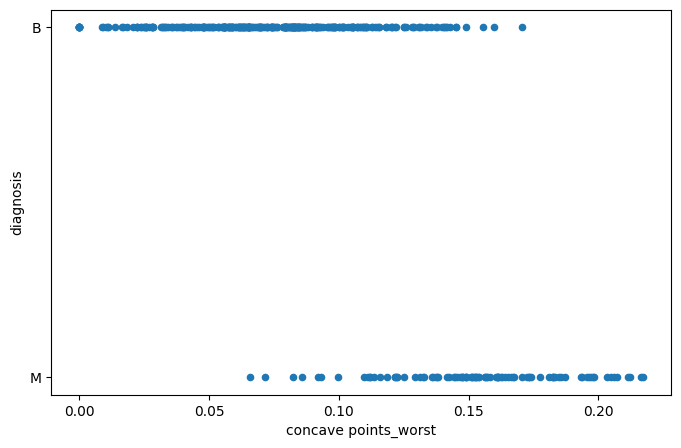

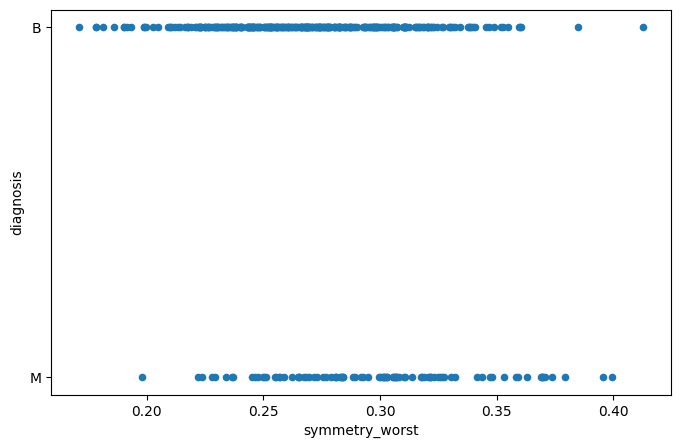

In [40]:
"""
Data preprocessing - outlier treatment
eliminating items from outside from of the 
1.5 * Inter Quartile Range (0.125% to 0.875% of the data)
"""
l_limit_perc = 0
h_limit_perc = 0.99

for column in df_cancer.columns:
    if column == 'diagnosis': 
        continue
    low_limit = df_cancer[column].quantile(l_limit_perc)
    high_limit = df_cancer[column].quantile(h_limit_perc)
    df_cancer = df_cancer.loc[(df_cancer[column] >= low_limit) & (df_cancer[column] <= high_limit)]

print(df_cancer.count())

# visualizing the values of each feature and the comparison to the output
for col in df_cancer.columns[:-1]:
    df_cancer.plot(x=col, y='diagnosis', kind='scatter', figsize=(8, 5))
plt.show()

In [ ]:
# feature engineering

# change value of output to 0 and 1
# 0 -> B
# 1 -> M

